In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
import math


In [4]:
class AgentState(TypedDict):
    values:List[int]
    name:str
    result:str
    operation:str

In [6]:
def process_values(state:AgentState) -> AgentState:
    """This function handles multiple different inputs and processes them."""
    operation:str = state["operation"]
    if operation == "+":
        state["result"] = f"Hi there {state['name']}, the sum of your values is {sum(state['values'])}"
    elif operation == "*":
        state["result"] = f"Hi there {state['name']}, the product of your values is {math.prod(state['values'])}"
    else:
        state["result"] = f"Invalid operation '{operation}'"
        
    print(state)
    return state

In [7]:
graph=StateGraph(AgentState)
graph.add_node("processor",process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app=graph.compile()

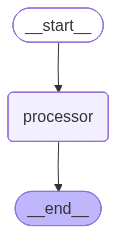

In [8]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
answers=app.invoke({
    "values":[1,2,3,4,5],
    "name":"Radha",
   "operation" : "*"
})

{'values': [1, 2, 3, 4, 5], 'name': 'Radha', 'operation': '*', 'result': 'Hi there Radha, the product of your values is 120'}


In [13]:
print(answers['result'])

Hi there Radha, the product of your values is 120


In [14]:
answers=app.invoke({
    "values":[1,2,3,4,5],
    "name":"Radha",
   "operation" : "+"
})

{'values': [1, 2, 3, 4, 5], 'name': 'Radha', 'operation': '+', 'result': 'Hi there Radha, the sum of your values is 15'}


In [15]:
print(answers['result'])

Hi there Radha, the sum of your values is 15


In [18]:
answers=app.invoke({
    "values":[1,2,3,4,5],
    "name":"Radha",
   "operation" : ""
})

{'values': [1, 2, 3, 4, 5], 'name': 'Radha', 'operation': '', 'result': "Invalid operation ''"}


In [19]:
print(answers['result'])

Invalid operation ''
